In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
ds = load_breast_cancer()
data = ds['data']
target = ds['target']
feature_names = ds['feature_names']

data = pd.DataFrame(data, columns=feature_names)
target = pd.DataFrame(target)

data.shape, target.shape

((569, 30), (569, 1))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)

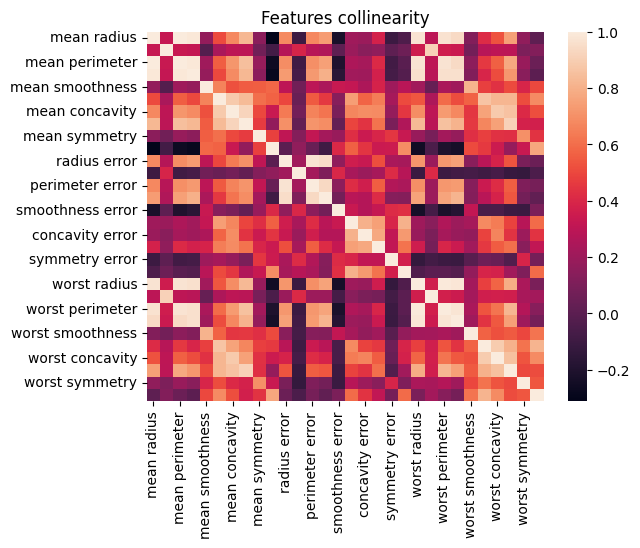

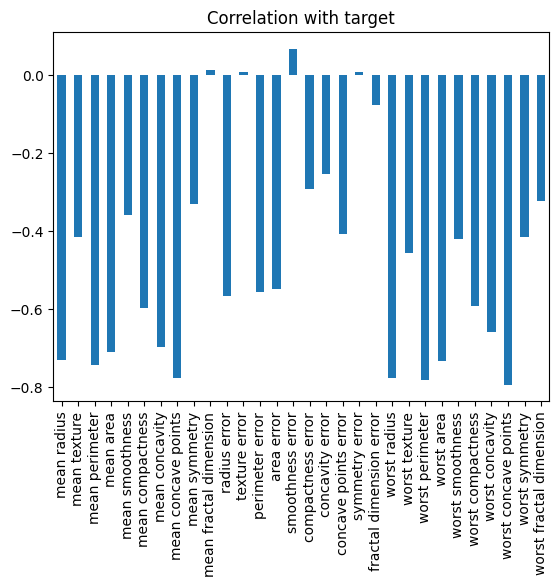

In [4]:
from explain.dataset import DatasetExplorer

de = DatasetExplorer(data, target)
de.display()

---

In [5]:
from explain.train import train_binary_classifier

final_model = train_binary_classifier(X_train, y_train, X_test, y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

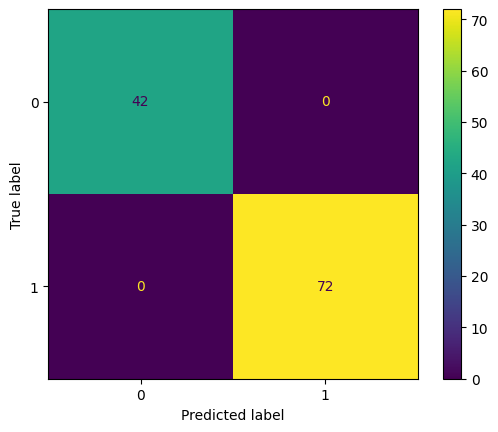

F1 score std on test set: 0.0


In [6]:
from explain.model import ModelEvaluator

model_eval = ModelEvaluator(final_model)
model_eval.confusion_matrix(X_test, y_test)
print('F1 score std on test set:', model_eval.calc_metric_folded(X_test, y_test, f1_score).std())

---

In [7]:
from explain.model import ModelExplainer

model_ex = ModelExplainer(final_model, data)

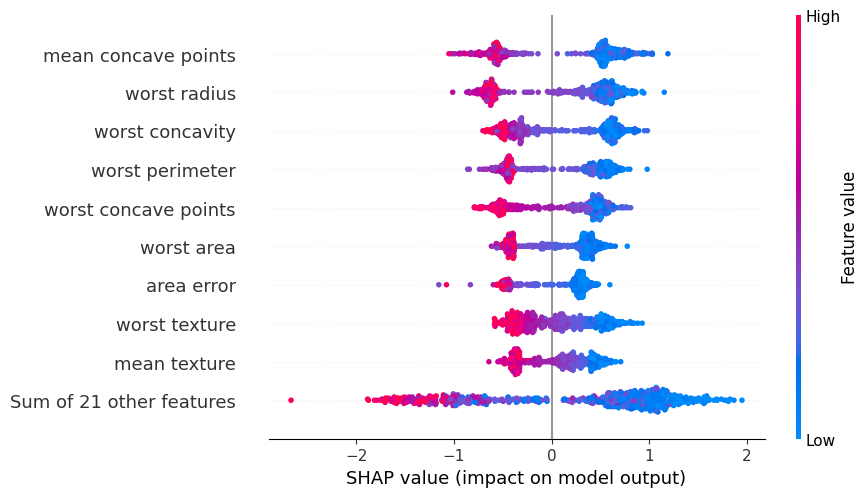

In [8]:
model_ex.plot_shap()

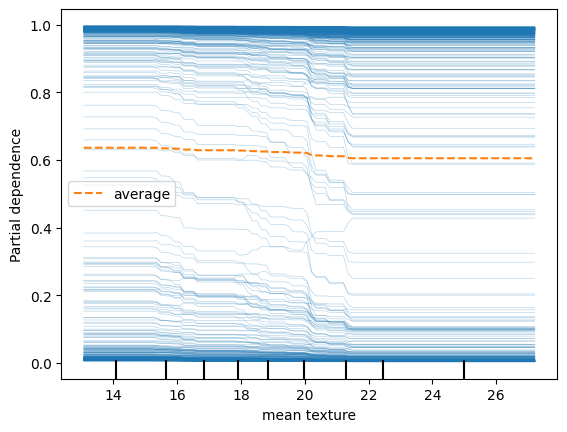

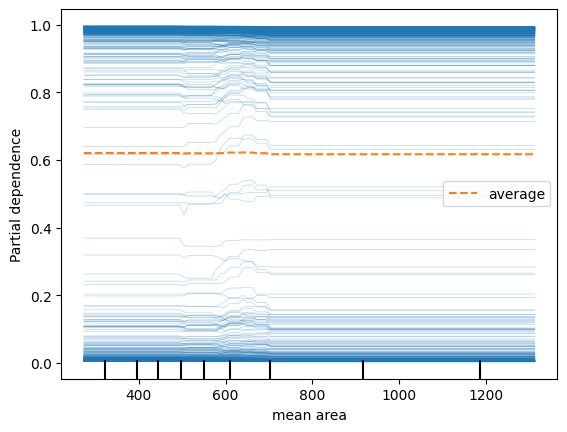

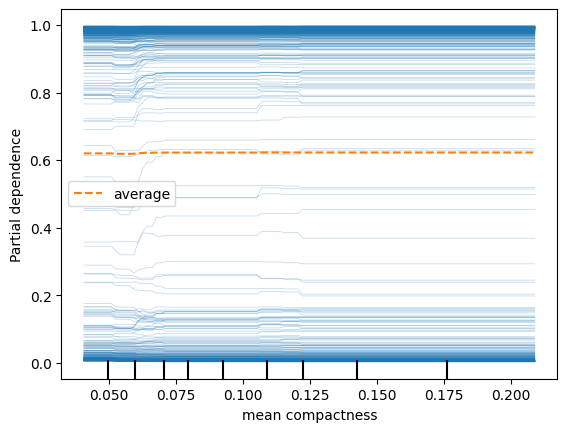

In [9]:
model_ex.plot_ICE([1, 3, 5])

---

<Axes: xlabel='DatasetSize', ylabel='Score'>

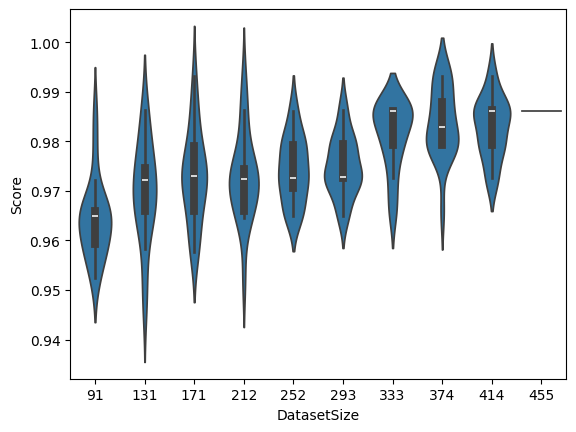

In [10]:
from explain.dataset import VirtualDataset

vds = VirtualDataset(final_model, f1_score, n_iter=10)
vds_res = vds.fit(data.to_numpy(), target.to_numpy(), density=20)
sns.violinplot(vds_res, x='DatasetSize', y='Score')